# Introduction to Artificial Neural Networks and Deep Learning


## Neuron

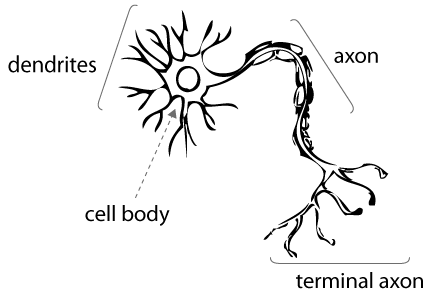

## Artificial Neuron

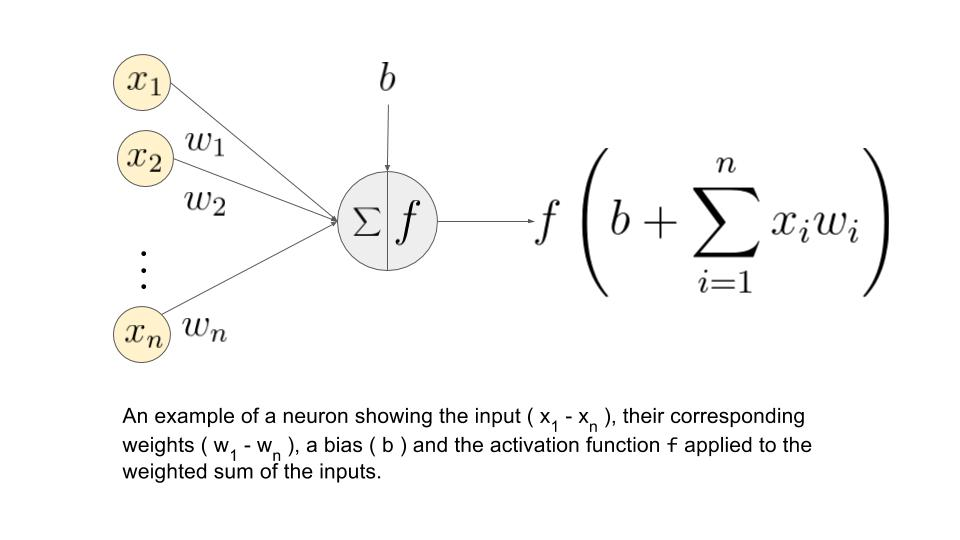

Image Credit: https://www.learnopencv.com/understanding-activation-functions-in-deep-learning/

## Artificial Neural Network

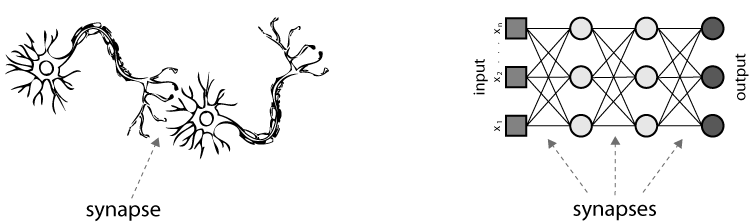

## The Keras library for Deep Learning

We will use the **Keras** library for building and training Deep Neural Networks.

Keras is a high-level neural networks API, written in Python. It was developed with a focus on enabling fast experimentation. *Being able to go from idea to result with the least possible delay is key to doing good research*.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

https://keras.io/

We will use the following manual:
- Deep Learning with Python. François Chollet. Manning. 2018.

Deep Learning Textbook:
- Machine Learning Yearning. Andrew Ng. http://www.mlyearning.org/

## The high-level Keras view of a Neural Network

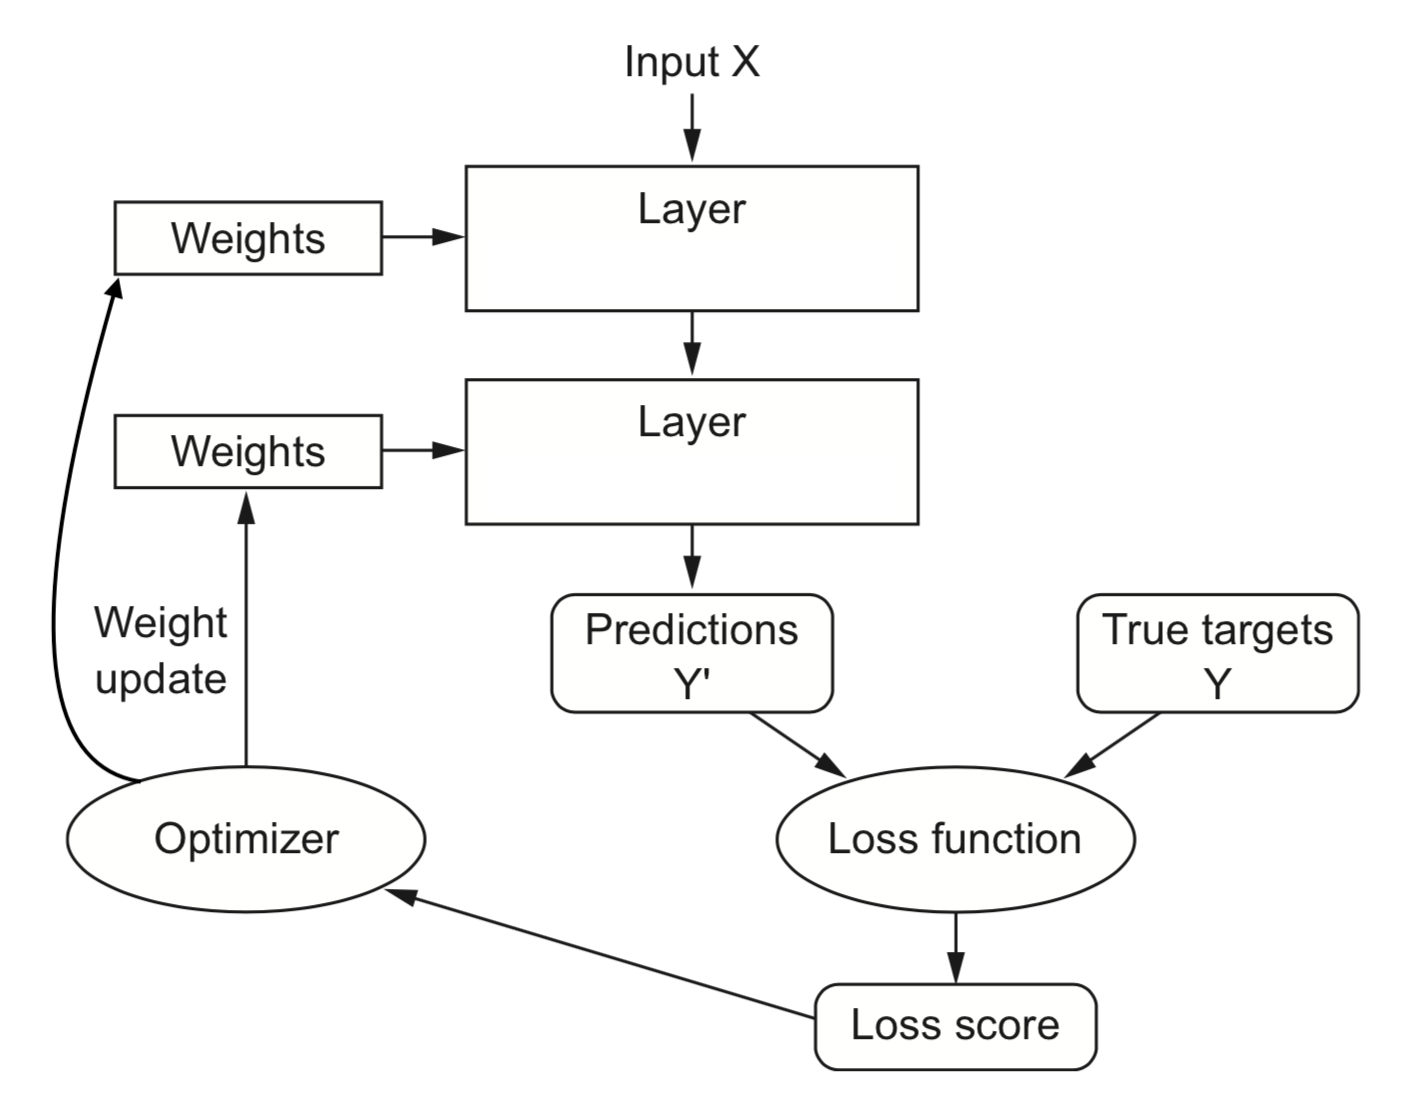

## Weights learning by Gradient Descent

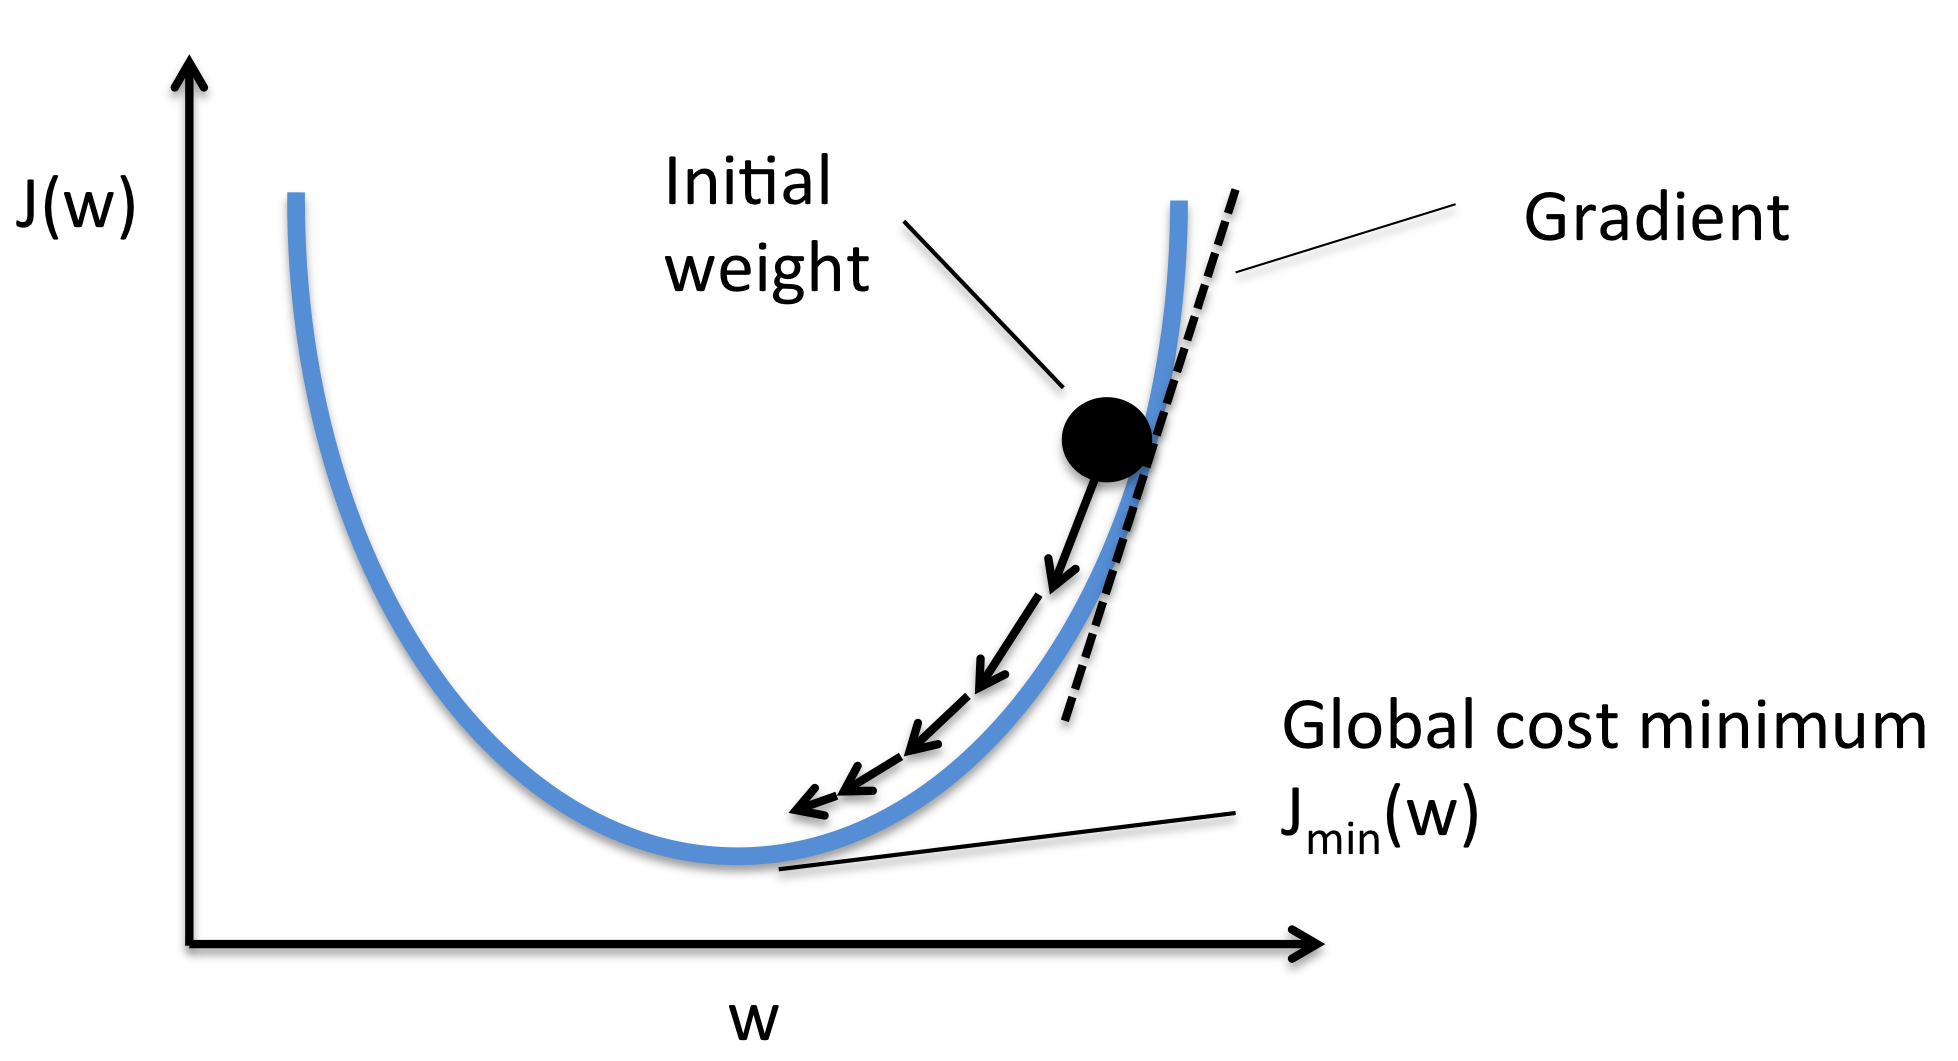

Given the loss function $J$, we want to find the weights $w$ that minimize the errror.

This is done through and iterative process called Gradient Descent according to the following rule

$$
w_i^{t+1} = w_i^{t} -\eta \frac{\partial J}{\partial  w_i^{t}}
$$

where the learning rate $\eta$ "smooths" the gradient descent direction.

The weight update is applied for each weight $w_i$ of the network.

The update is computed after measuring the loss $J$ on a batch of training instances.

An epoch consists in processing all the batches in the dataset.

Multiple epochs are repeated until convergence.

The implementation of this process is known as **back-propagation** for the efficient strategy that can be exploited for the case of artificial neural networks. 

## Universal Approximation Theorem

The artificial neural network below can approximate any continuous function with a sufficiently large set of neurons in the middle (hidden) layer.

This theorem "justifies" the use of artificial neural networks for any learning task of your choice.

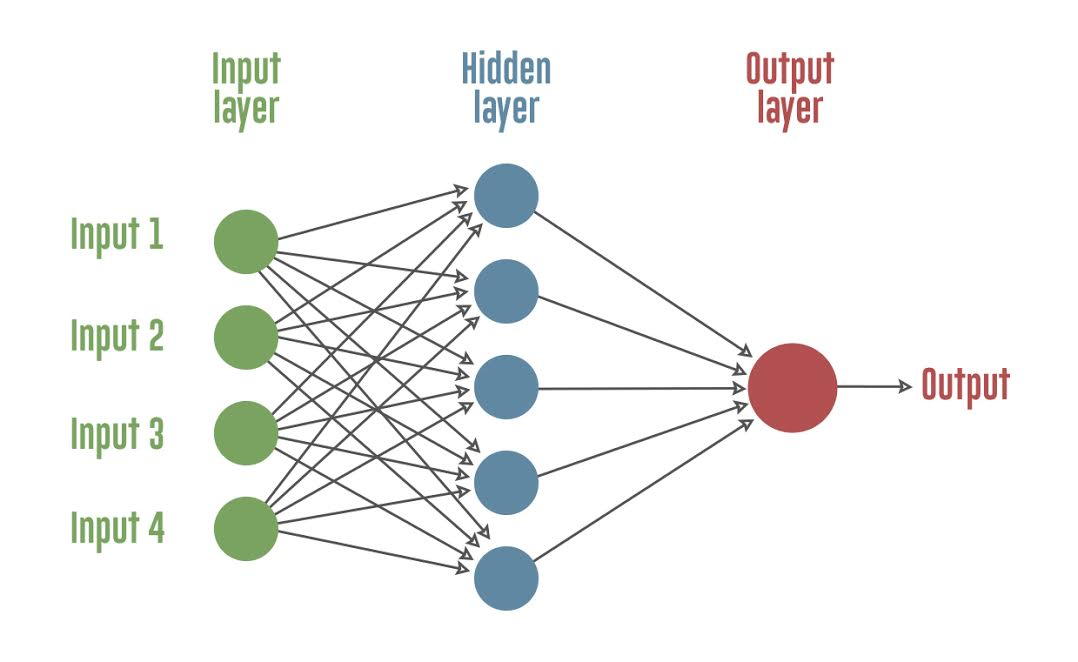

## Real-world classification: breast cancer dataset



In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print( data.DESCR )

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
train_X = data.data
train_y = data.target

In [3]:
print (train_X.shape)

(569, 30)


In [4]:
print (train_y.shape)
print (data.target_names)
print (train_y[:20])

(569,)
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [5]:
import pandas as pd
pd.DataFrame(train_X).describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Data standardization and normalization

- **Standardization** is a preprocessing step that rescales the data so as to have 0 mean and standrad deviation equal to 1
  - subtract mean, divide by std
- Alternatively, **normalization** could be used to as to rescale data in the interval [0,1]
- In both cases the goal is to have features/attributes on the same scale, and therefore with similar impact on the training

In [6]:
# standardize data
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
train_X = normalizer.fit_transform(train_X)

In [7]:
pd.DataFrame(train_X).describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [8]:
num_instances, num_features = train_X.shape
print (num_instances, num_features)

569 30


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# initialize the network
model = models.Sequential()

# add nodes to the network
model.add( 
    layers.Dense(8,                   # no. of neurons
                 activation='sigmoid', # activation function
                 input_shape=(num_features,) # shape of the input
                ))
model.add( 
    layers.Dense(1,                   # no. of neurons
                 activation='sigmoid' # activation function
                ))

# finalize the network
model.compile( optimizer=optimizers.Adam(learning_rate=.01), # lr is the learning rate
               loss='binary_crossentropy',
               metrics=['acc'] )

# train the network
hist = model.fit( x=train_X, # training examples
                  y=train_y, # desired output
                  epochs=500, # number of training epochs 
                  verbose=1) # you can change verbosity to 1

Epoch 1/500


18/18 [==============================] - 1s 2ms/step - loss: 0.5551 - acc: 0.7030
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.2803 - acc: 0.9367
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1970 - acc: 0.9543
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1509 - acc: 0.9736
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1224 - acc: 0.9789
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1040 - acc: 0.9807
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0918 - acc: 0.9842
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 0.0828 - acc: 0.9842
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0772 - acc: 0.9842
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0719 - acc: 0.9859
Epoch 11/500
18/18 [==============================] - 0s 2ms/step - los

In [10]:
hist.history.keys()

dict_keys(['loss', 'acc'])

In [11]:
hist.history['acc']

[0.8471001982688904,
 0.9332161545753479,
 0.9595782160758972,
 0.9736379384994507,
 0.9771528840065002,
 0.982425332069397,
 0.9841827750205994,
 0.9876977205276489,
 0.9876977205276489,
 0.9859402179718018,
 0.9876977205276489,
 0.9859402179718018,
 0.9859402179718018,
 0.9876977205276489,
 0.9876977205276489,
 0.9841827750205994,
 0.9841827750205994,
 0.9841827750205994,
 0.9876977205276489,
 0.9876977205276489,
 0.9841827750205994,
 0.9876977205276489,
 0.9876977205276489,
 0.9876977205276489,
 0.9876977205276489,
 0.9841827750205994,
 0.9841827750205994,
 0.9876977205276489,
 0.9876977205276489,
 0.9876977205276489,
 0.9876977205276489,
 0.9876977205276489,
 0.9894551634788513,
 0.9859402179718018,
 0.9876977205276489,
 0.9894551634788513,
 0.9912126660346985,
 0.9876977205276489,
 0.9894551634788513,
 0.9912126660346985,
 0.9912126660346985,
 0.9894551634788513,
 0.9912126660346985,
 0.9912126660346985,
 0.9912126660346985,
 0.9912126660346985,
 0.9894551634788513,
 0.99121266603

In [12]:
print ("Accuracy:", hist.history['acc'][-1])

Accuracy: 1.0


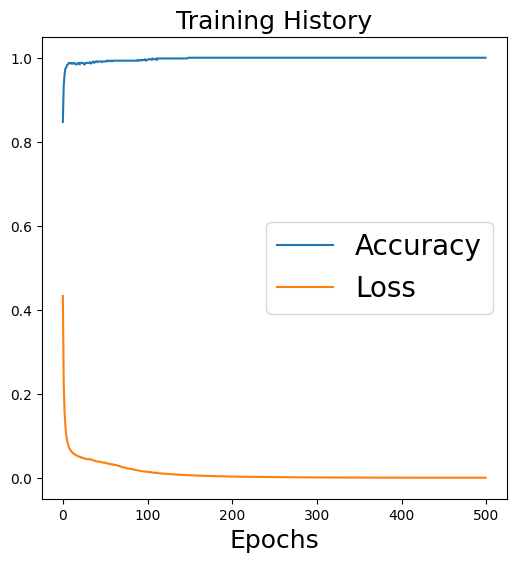

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot training epochs
fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['acc'], label='Accuracy')
axes.plot(hist.history['loss'], label='Loss')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20);

## Breast Cancer Diagnosis from digital images

Link: https://ai.googleblog.com/2018/10/applying-deep-learning-to-metastatic.html

![lyna_zoom_high_res.gif](https://3.bp.blogspot.com/-6mQ_1IuZT0A/W7_1YaKb_-I/AAAAAAAADXY/2AwLVld45Fchd6LsJXKcVD_zl-VQ3KcXgCLcBGAs/s640/lyna_zoom_high_res.gif)

## Remarks

- **epochs** is the number of training iterations, i.e., the number of times the data is processed, 
  - the larger the better
- **learning rate** is the confidence given by the optimizer to the single training step
  - larger learning rate means faster training
  - smaller means more conservative, usually more accurate, and slower.
- **one hidden layer** is sufficient to learn any function if there are enough neurons
- **standardization** or **normalization in [0,1]** is highly recommended, almost mandatory
- **training is very sensitive to all of the above parameters**

## Long Summary

## Artificial Neural Network Layers

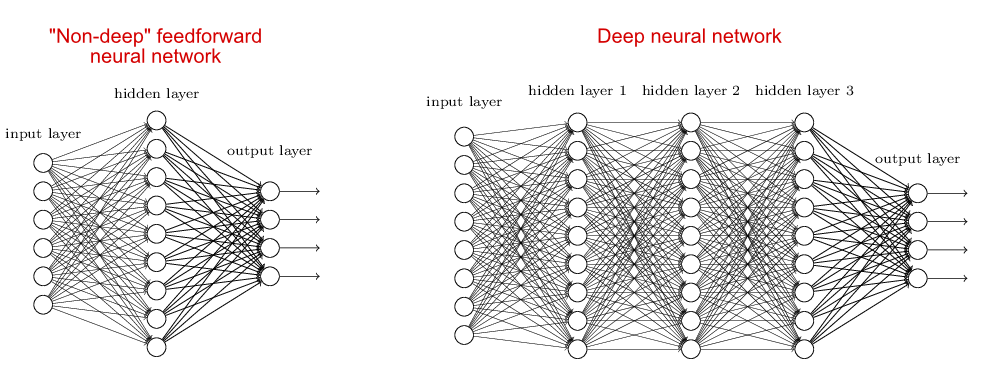

Artificial Neural Networks can be built by staking several layers:
- One hidden layer is theoretically enough
- **More layers mean a more powerful network**
- **More neurons mean a more powerful network**
- The number of **input neurons** depends on the dimensionality of the input
- The number of **output neurons** depends on the dimensionality of the output
- Layers are **densely connected** (all to all).
- Each connections has an associated weight
- The learning/training consists in **finding the best weights**.

#### Keras Neural Network Layers

See: https://keras.io/layers/core/

There are several kinds of layers. We are now interested in **Dense Layers**.

There are 3 main parameters:
- number of neurons in the layer
- activation function (*discussed later*)
- input shape

```python
# Sequential is a generic container for the network
model = models.Sequential()

# add one densely connected layer with 9 nodes
#         configure its input of dimensionality 8
# this is the first hidden layer
model.add(layers.Dense(9, activation='sigmoid', input_shape=(8,)))

# after the first layer, you don't need to specify
# the size of the input anymore:
# this is the second hidden layer
model.add(layers.Dense(9, activation='sigmoid'))

# this is the third hidden layer
model.add(layers.Dense(9, activation='sigmoid'))

# this is the output layer
model.add(layers.Dense(4, activation='sigmoid'))
```

## Activation Functions


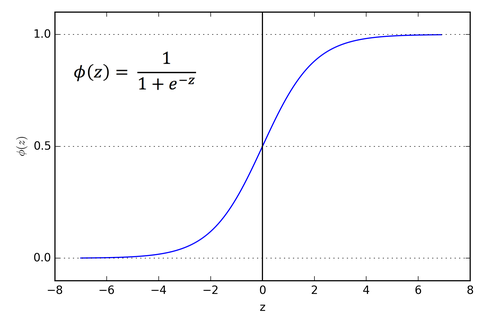

Image Credit: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

The activation function determines the output of each neuron.

So far, we used the "old" **sigmoid function** depicted above.
- whatever input, the output is in the "controlled" interval [0,1]
- it "discards" very large and very small inputs
- being non-linear, it allows to learn complex functions, i.e., non-linear behaviours

There are several functions with different properties (there is academic research on that). 

What we really care here is the **output of the activation**:
- sigmoid output is in [0,1], 
- which is good for binary classification (probability of class 1)
- it is good if we want to predict a percentage
- it is not good if we want to predict in other domains:
  - tomorrow's temperature?
  - tomorrow's stock prices?

## Keras Activation Functions

See: https://keras.io/activations/

Note that all the source codes below are equivalent:

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add( layers.Dense(9, activation='sigmoid', input_shape=(8,)) )
model.add( layers.Dense(9, activation='sigmoid') )

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
    
model.add( layers.Dense(9, input_shape=(8,)) )
model.add( layers.Activation("sigmoid"))

model.add( layers.Dense(9) )
model.add( layers.Activation("sigmoid"))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

model = Sequential()
    
model.add( Dense(9, input_shape=(8,)) )
model.add( Activation("sigmoid"))

model.add( Dense(9) )
model.add( Activation("sigmoid"))

## Loss Function

The loss function measures the error between the network prediction and the desired output.

The loss to be used depends on the specific learning task.

If we are doing a regression task, then Mean Squared Error is a good loss.

For the binary prediction task we used **Binary Cross-Entropy**,
which is a way to measure the dissimilarity between two probability distributions.
- roughly speaking, it takes two probabilities (numbers between 0 and 1) and it measures an entropy-based distance.
- this is the way to go for a binary classification task
- Note 1: the sigmoid at the output node produces a number in [0,1]
- Note 2: the desired values we prepared were exactly 0s or 1s



## Keras Loss functions and Optimizers

See: https://keras.io/losses/, https://keras.io/optimizers/

In Keras, the loss is a parameter of the `compile` method of the model.
This is the last method you should invoke after the network definition and before the fitting.

```python
model.compile(loss='mean_squared_error', optimizer='sgd')
```

An mandatory parameter of the `compile` method is the `optimizer`.
The optimizer is in charge of translating a loss into a weight update.
- large loss, large updates
- small loss, small updates

All optimizers have a learning rate parameter which is a multiplicative factor of the produced update.
- small learning rates reduce the update magnitude and produce a conservative and usually well-performing training curve
- large learning rates produce large "greedy" updates which may cause non convergence

Different optimizers exploit different strategies for adaptively changing the learning rate
- start large, end small

Keras provide several optimizers:
- `sgd` is Stochastic Gradient Descent
- `rmsprop` adaptively maintains a learning rate for each parameter
- `adam` improvement of the above

Usually, you pick a small (or very small) learning rate and one of the most above optimizers.
- tuning the learning rate is one of the last steps
- testing different optimizers is the very last step.

## That's already lot !!!

<!-- ![info-overload1.jpg](attachment:info-overload1.jpg) -->

## But it is not enough !!

A good architecture for image classification.

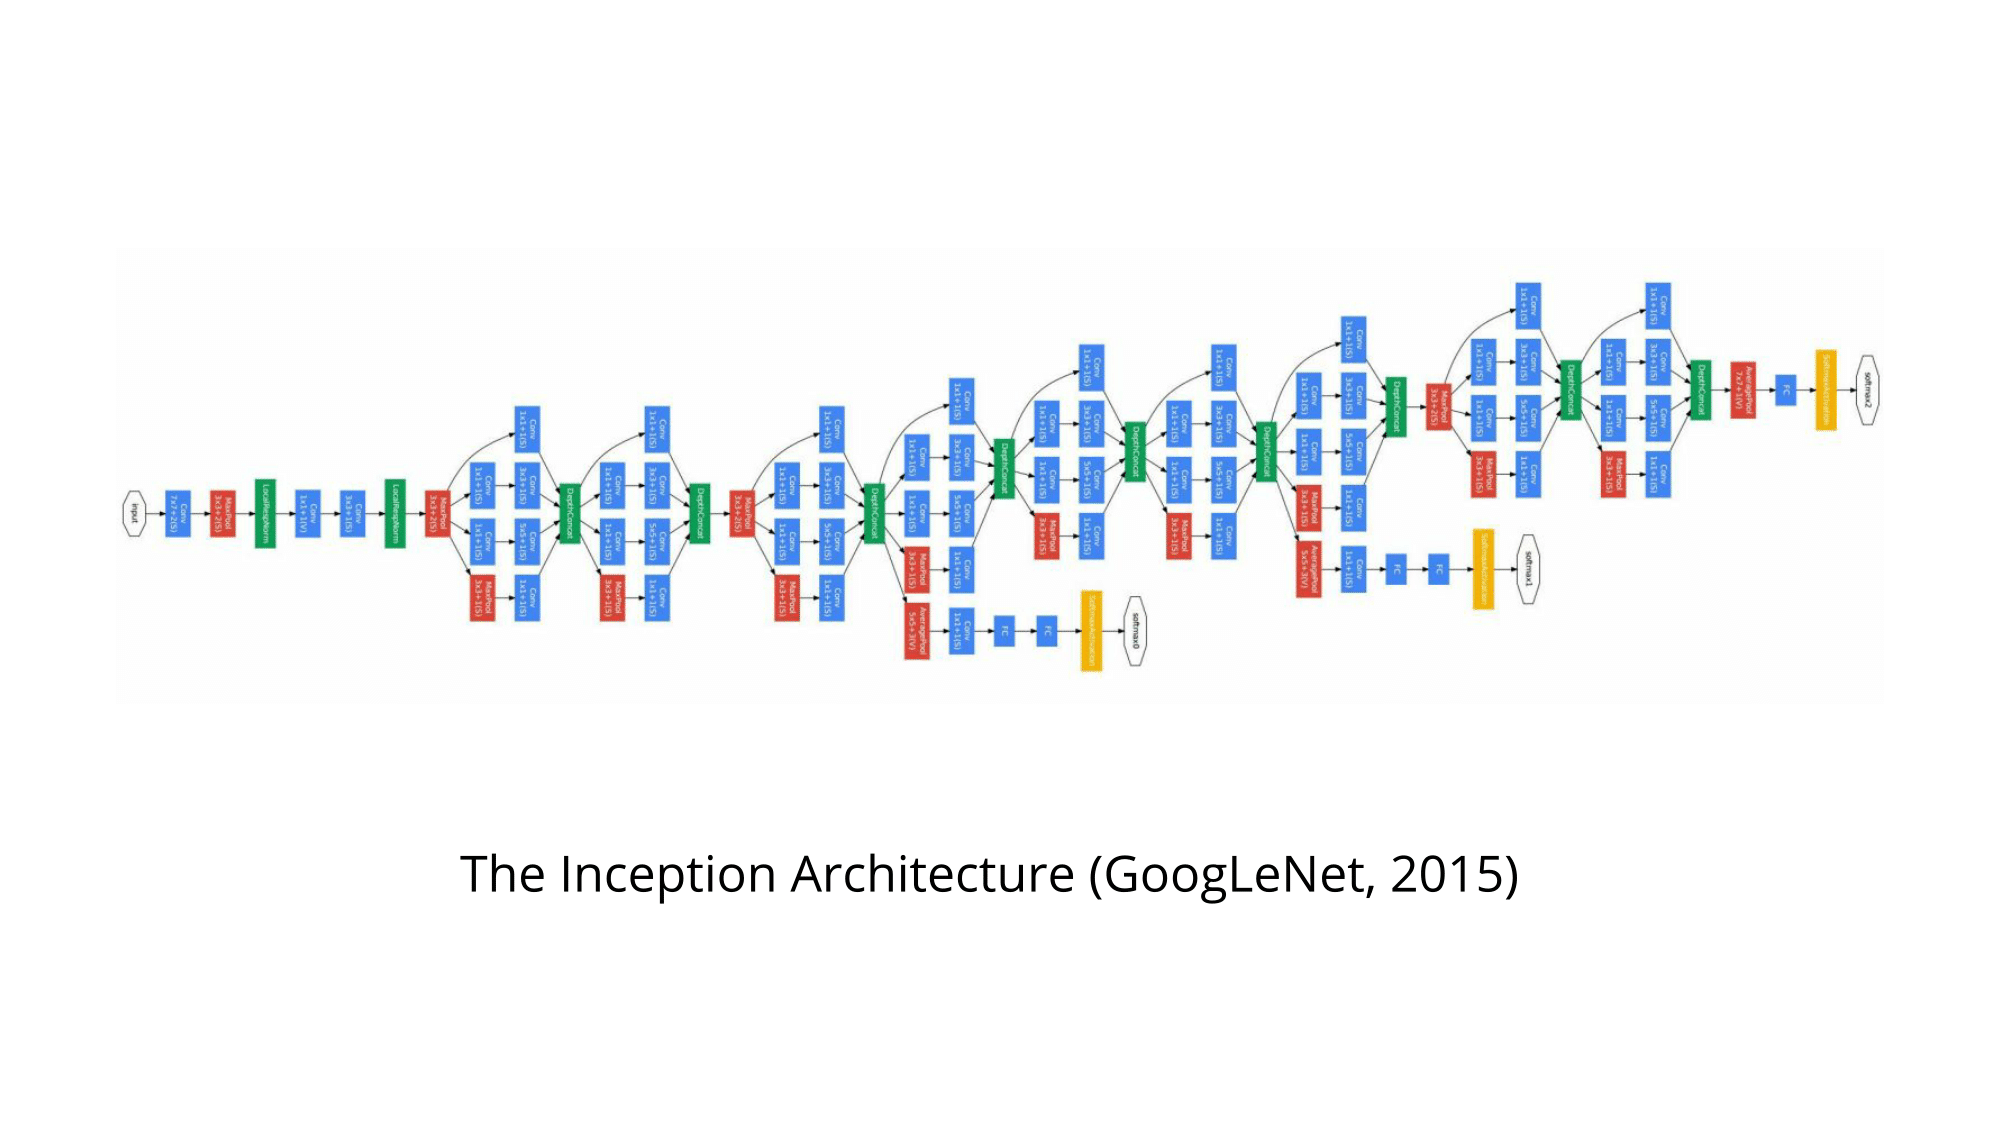

## Handwritten Digit Recognition

- Goal: write a ANN able to "read" hand-written digits

In [17]:
# load the data
# (made available by the keras library)

from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)


In [18]:
import numpy as np

np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [19]:
print (train_images[0].shape)
print (train_images[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

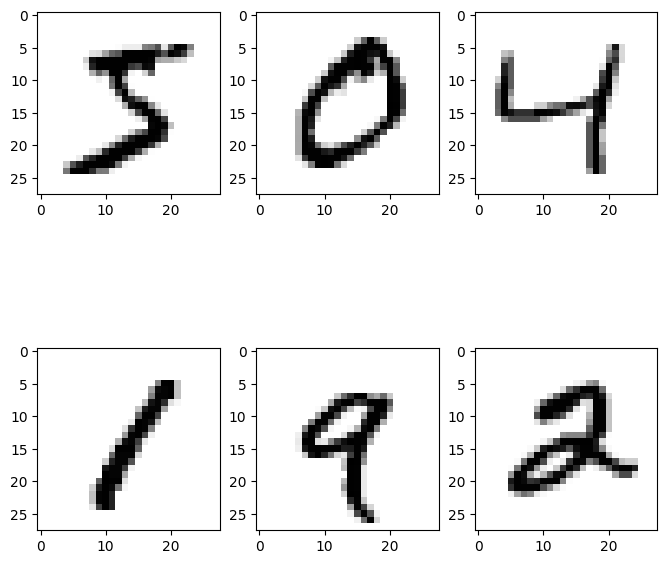

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt


# view some of the images

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,8))

axes[0,0].imshow(train_images[0], cmap="gray_r")
axes[0,1].imshow(train_images[1], cmap="gray_r")
axes[0,2].imshow(train_images[2], cmap="gray_r")
axes[1,0].imshow(train_images[3], cmap="gray_r")
axes[1,1].imshow(train_images[4], cmap="gray_r")
axes[1,2].imshow(train_images[5], cmap="gray_r");

In [21]:
print (train_labels[:6])

[5 0 4 1 9 2]


## Build a new Network

- **Question:** what's the first step ?

## What's the output?

- For the binary classification task:
  - our previous network had one output meaning the probability of class 1.

- How can we **generalize** from 2 classes to 10 digits?
  - we can have **10 output neurons**
  - each estimating the **probability of the $i$-th digit**


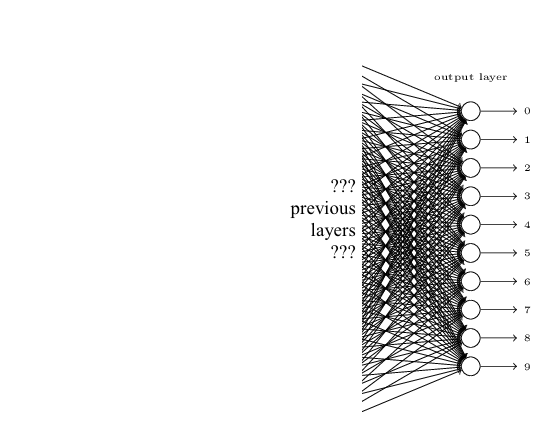

## What's the activation function?

- Every output neuron is a replica of the single neuron we used before
  - it takes the same inputs from the previous layer
  - *but* it uses different weights to combine them
  - each produces a number, which we interpret as a probability


- Given this new network, 
  - **we classify the input image on the basis of the neuron that produces the largest output**.


- The output of the various neurons are *somehow* unrelated.
  - as we want to interpret them as a **probabilities**
  - we want to enforce the 10 outputs to sum up to 1
  
- To do so, we use the **SoftMax** activation function:
  - it makes sure output is positive
  - and sum of output neurons is 1
$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}}
$$


- Differently from sigmoid, which is *local* to a neuron, SoftMax is a function of the whole layer, it is *global* to the layer.


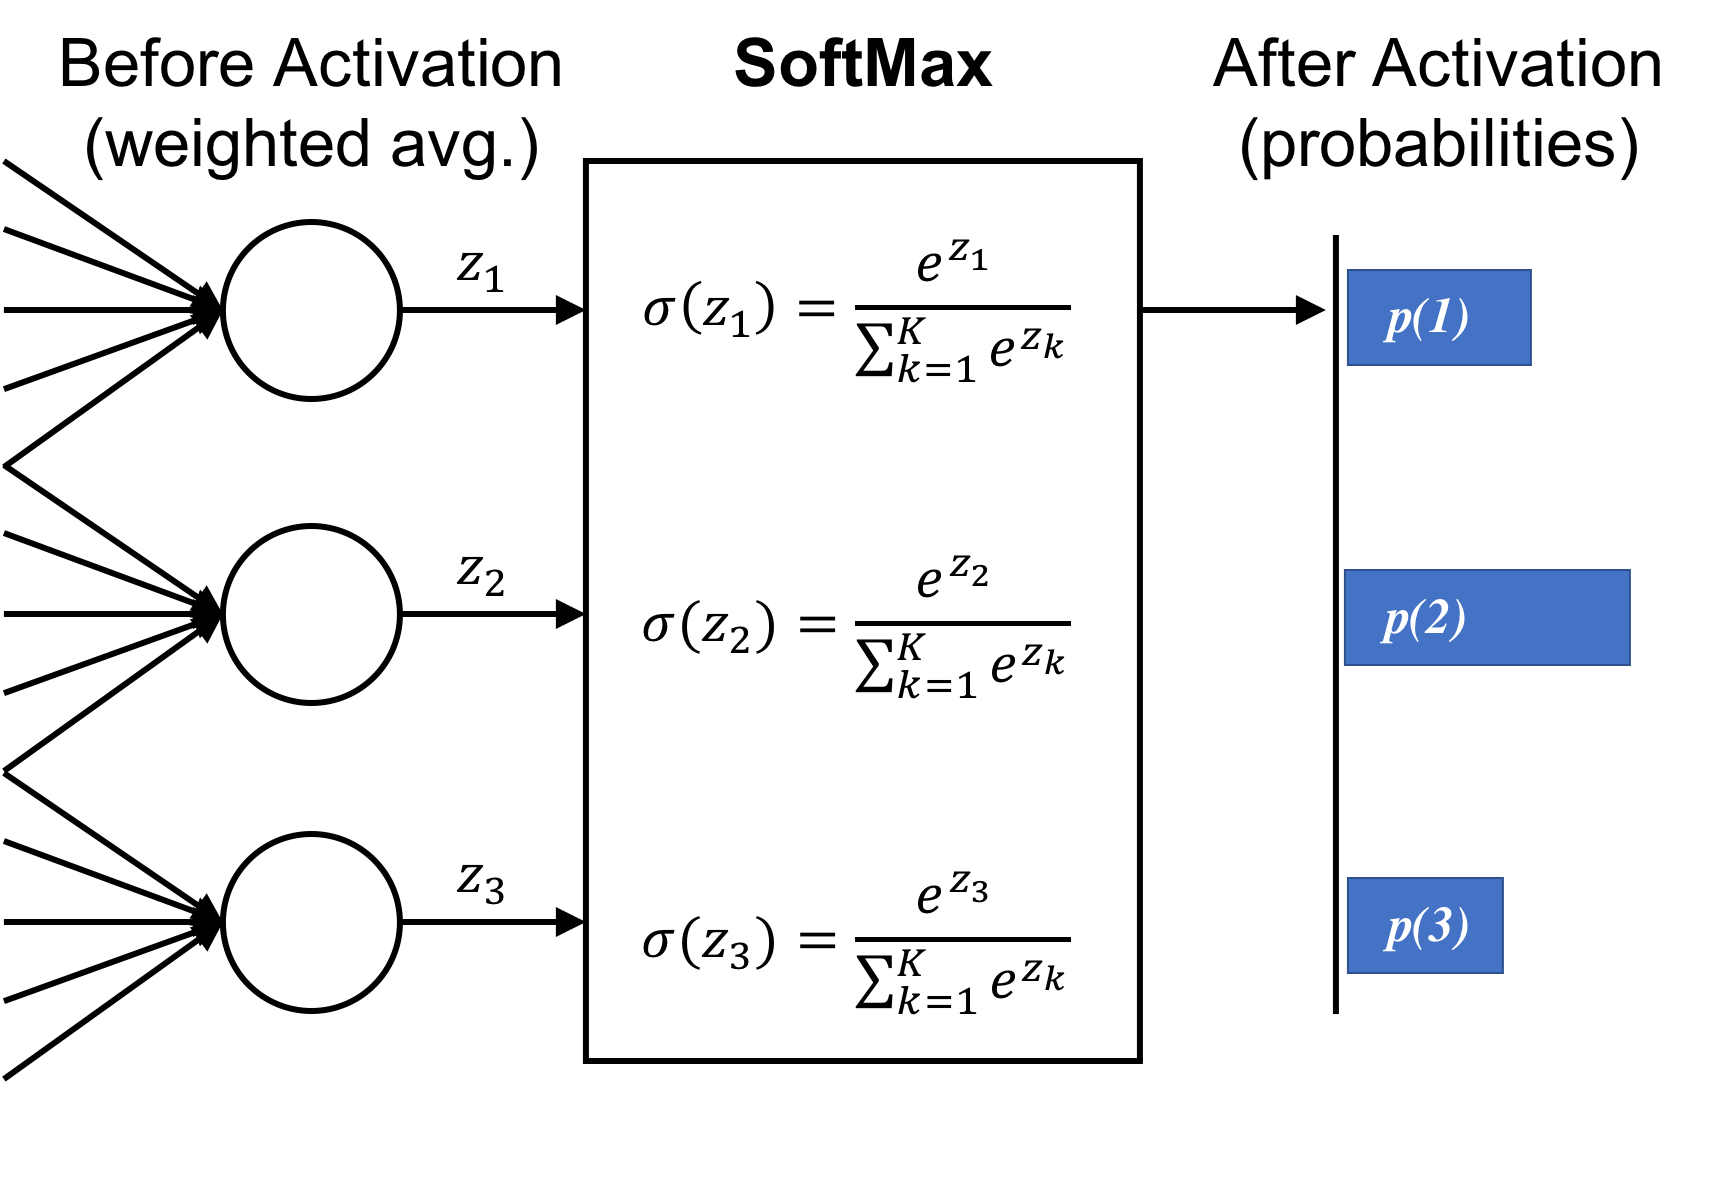

## Softmax in Keras

See: https://keras.io/activations/

It works as any other activation function

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(layers.Dense(512, input_shape=(444,)))
model.add(layers.Activation("sigmoid"))

## add as many as you want

model.add(layers.Dense(10))
model.add(layers.Activation("softmax"))
```

## What's the Loss?

- We have 10 outputs representing a probability distribution over classes
  - for a given image the output of the network could be something like:
    - `[ 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1]`
  - meaning that digit `8` is the most probable according to the network


- Suppose the digit was indeed a `9`:
  - it is a good idea to represent the desired output in the same way of the network output:
    - `[ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]`


- We need a loss function that compare the network output with the desired output.
  - i.e., that compare the above distribution probabilities


- While binary cross-entropy compare 2 probabilities


- The loss **categorical cross-entropy** compares 2 **distribution probabilities**


## Categorical Cross-entropy in Keras

- See: https://keras.io/losses/

Recall that the loss is a parameter of the `compile` method:
```python
# finalize the network
model.compile( optimizer=optimizers.Adam(lr=.1),
               loss='categorical_crossentropy',
               metrics=['acc'] )
```

## Desired output for categorical data

- Recall the shape of the training data we have

In [22]:
print (train_labels.shape)
print (train_labels[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


- For each label we now need a vector of probability distributions


- We are lucky enough as Keras already provides this transformation

In [23]:
from tensorflow.keras.utils import to_categorical

to_categorical(train_labels[:10])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

- The above is commonly known as **one-hot encoding**.

## What's the input

- Recall the input is given as a matrix of integers

- It's a good practice to:
  - provide float values instead of integers, to make sure computation is accurate
  - Normalize the data either:
    - by Standardization (mean=0, and standard deviation=1)
    - by Normalization in the range [0,1]

In [24]:
import numpy as np
print (np.min(train_images), np.max(train_images))

0 255


- We can easily normalize in the range [0,1]

In [25]:
train_images[0].astype("float64") / 255.0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
(train_images[0].astype("float64") / 255.0).dtype

dtype('float64')

## Build the network

Now we know what's needed to build the following network
- 784 input neurons: one per pixel (28x28)
- 1 hidden layer of 15 neurons
- 1 output layer of 10 neurons
- softmax activation for the last layer
- categorical crossentropy loss
- one-hot encoding for training labels

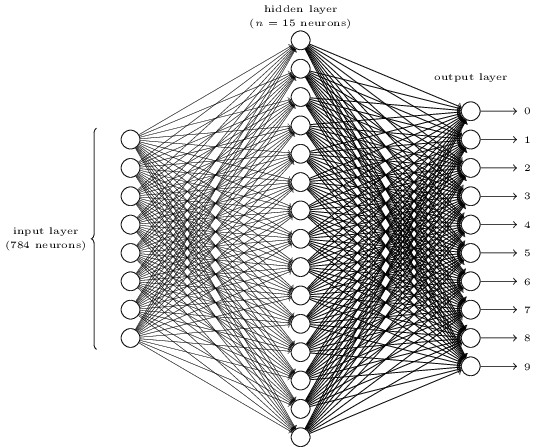

In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

import numpy as np

# load the data
(train_images, train_labels), _ = mnist.load_data()

num_images, img_x, img_y = train_images.shape

print ("Training contains", num_images, "images of ", 
       img_x, "x", img_y, "pixels.")

# transform data in the proper format

# linearize images
train_images = train_images.reshape( (num_images, img_x * img_y) )
train_images = train_images.astype("float64") / 255.0
# one-hot-encoding of labels
train_labels = to_categorical(train_labels)


# initialize the network
model = Sequential()

# add nodes to the network
model.add( Dense(15, # neurons in the first hidden layer
                 input_shape=(img_x*img_y,) # input size
                ) )
model.add( Activation("sigmoid") )

model.add( Dense(10) )
model.add( Activation("softmax") )

# finalize the network
model.compile( optimizer="rmsprop", #optimizers.Adam(lr=.01),
               loss='categorical_crossentropy',
               metrics=['acc'] )

# train the network
hist = model.fit( x=train_images, # training examples
                  y=train_labels, # desired output
                  epochs=10,      # number of training epochs 
                  verbose=1)

Training contains 60000 images of  28 x 28 pixels.
Epoch 1/10
1875/1875 [==============================] - 1s 452us/step - loss: 0.7925 - acc: 0.8128
Epoch 2/10
1875/1875 [==============================] - 1s 422us/step - loss: 0.3322 - acc: 0.9100
Epoch 3/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.2792 - acc: 0.9201
Epoch 4/10
1875/1875 [==============================] - 1s 417us/step - loss: 0.2537 - acc: 0.9271
Epoch 5/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.2373 - acc: 0.9315
Epoch 6/10
1875/1875 [==============================] - 1s 418us/step - loss: 0.2252 - acc: 0.9358
Epoch 7/10
1875/1875 [==============================] - 1s 429us/step - loss: 0.2159 - acc: 0.9379
Epoch 8/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.2086 - acc: 0.9399
Epoch 9/10
1875/1875 [==============================] - 1s 422us/step - loss: 0.2018 - acc: 0.9424
Epoch 10/10
1875/1875 [==============================] - 1

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                11775     
                                                                 
 activation_4 (Activation)   (None, 15)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 11935 (46.62 KB)
Trainable params: 11935 (46.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Accuracy: 0.9430666565895081


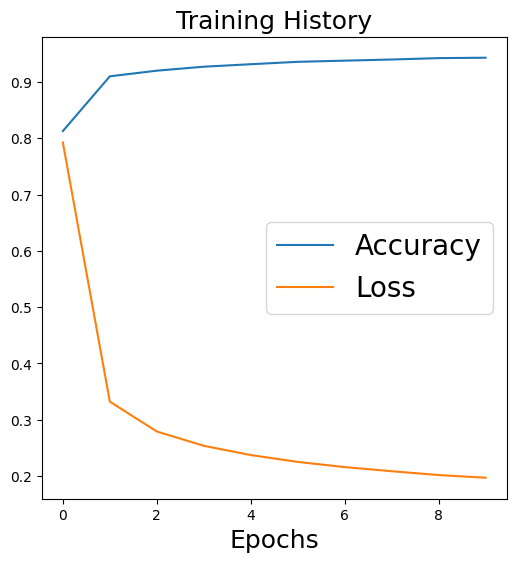

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(figsize=(6,6))

axes.plot(hist.history['acc'], label='Accuracy')
axes.plot(hist.history['loss'], label='Loss')

axes.set_title("Training History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)

# Final accuracy
print ("Accuracy:", hist.history['acc'][-1])

In [33]:
# uncomment if needed
#import sys
#!{sys.executable} -m pip install seaborn

1875/1875 [==============================] - 1s 325us/step
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.97      0.98      0.97      6742
           2       0.93      0.93      0.93      5958
           3       0.95      0.91      0.93      6131
           4       0.93      0.95      0.94      5842
           5       0.92      0.92      0.92      5421
           6       0.96      0.97      0.96      5918
           7       0.95      0.97      0.96      6265
           8       0.95      0.92      0.93      5851
           9       0.93      0.92      0.93      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.94      0.94     60000
weighted avg       0.95      0.95      0.95     60000



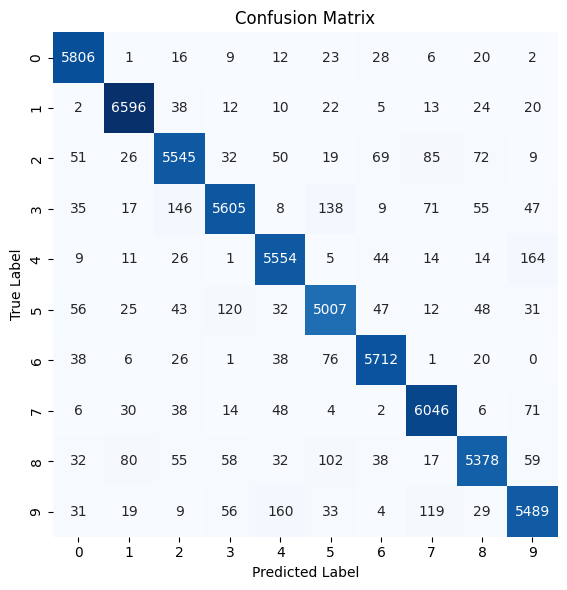

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# convert form prediction to id
y_pred = model.predict(train_images)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

# convert from on-hot to original 
# (we could take the original)
y_true = np.argmax(train_labels, axis=1) # argmax along axis 1

# compute classification report
print ("Classification Report")
print ( classification_report(y_true, y_pred) )

# compute confusion matrix
mat = confusion_matrix(y_true, y_pred)

fig, axes = plt.subplots(figsize=(6,6), tight_layout=True)
sns.heatmap(mat, square=True, annot=True, fmt='d', 
            cbar=False, cmap="Blues")
axes.set_xlabel('Predicted Label');
axes.set_ylabel('True Label')
axes.set_title('Confusion Matrix');

# What about the validation set?

Please avoid overfitting !!

Keras requires just a simple additional parameter to the fit function.

 - https://keras.io/api/models/model_training_apis/#fit-method

In [35]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

import numpy as np

# load the data
(train_images, train_labels), _ = mnist.load_data()

num_images, img_x, img_y = train_images.shape

print ("Training contains", num_images, "images of ", 
       img_x, "x", img_y, "pixels.")

# transform data in the proper format

# linearize images
train_images = train_images.reshape( (num_images, img_x * img_y) )
train_images = train_images.astype("float64") / 255.0
# one-hot-encoding of labels
train_labels = to_categorical(train_labels)


# initialize the network
model = Sequential()

# add nodes to the network
model.add( Dense(15, # neurons in the first hidden layer
                 input_shape=(img_x*img_y,) # input size
                ) )
model.add( Activation("sigmoid") )

model.add( Dense(10) )
model.add( Activation("softmax") )

# finalize the network
model.compile( optimizer="rmsprop", #optimizers.Adam(lr=.01),
               loss='categorical_crossentropy',
               metrics=['acc'] )

# train the network
hist = model.fit( x=train_images, # training examples
                  y=train_labels, # desired output
                  epochs=40,      # number of training epochs 
                  validation_split = 0.2,  # 20% is randomly sampled 
                  verbose=1)

Training contains 60000 images of  28 x 28 pixels.
Epoch 1/40
1500/1500 [==============================] - 1s 592us/step - loss: 0.8968 - acc: 0.8021 - val_loss: 0.4213 - val_acc: 0.8984
Epoch 2/40
1500/1500 [==============================] - 1s 536us/step - loss: 0.3710 - acc: 0.9027 - val_loss: 0.3028 - val_acc: 0.9175
Epoch 3/40
1500/1500 [==============================] - 1s 522us/step - loss: 0.2969 - acc: 0.9160 - val_loss: 0.2665 - val_acc: 0.9245
Epoch 4/40
1500/1500 [==============================] - 1s 517us/step - loss: 0.2667 - acc: 0.9236 - val_loss: 0.2483 - val_acc: 0.9298
Epoch 5/40
1500/1500 [==============================] - 1s 519us/step - loss: 0.2485 - acc: 0.9285 - val_loss: 0.2361 - val_acc: 0.9306
Epoch 6/40
1500/1500 [==============================] - 1s 534us/step - loss: 0.2354 - acc: 0.9314 - val_loss: 0.2288 - val_acc: 0.9348
Epoch 7/40
1500/1500 [==============================] - 1s 525us/step - loss: 0.2264 - acc: 0.9341 - val_loss: 0.2229 - val_acc: 0.93

In [36]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

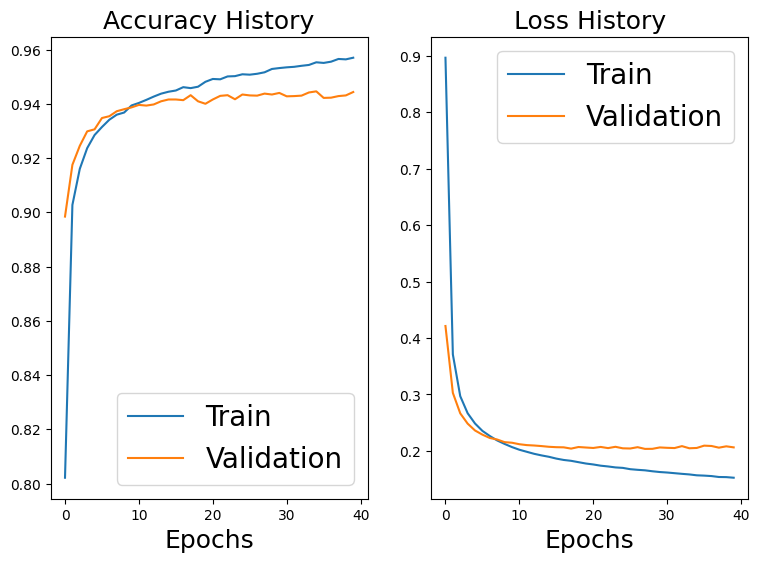

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))

axes[0].plot(hist.history['acc'], label='Train')
axes[0].plot(hist.history['val_acc'], label='Validation')
axes[0].set_title("Accuracy History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=20)

axes[1].plot(hist.history['loss'], label='Train')
axes[1].plot(hist.history['val_loss'], label='Validation')
axes[1].set_title("Loss History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[1].legend(fontsize=20);

 Check yourself what happens with more epochs.

## Summary

### Output for a N-class classification problem

- your network should have $N$ output neurons
- i.e., it should have **a dense layer with $N$ units**
- **SoftMax** activation provides the output of those units are translated into a probability distribution

### Training Labels

- training labels should be similarly encoded as a probability distribution
- **one-hot encoding** transforms a label id (an integer number) in to a vector of 0s except for the position corresponding to the label id.

## Loss Function

- The right loss function for multi-class classification is **categorical_crossentropy**.

## Network Architecture

- the network is not limited to one hidden layer.
- it can have several different hidden layers, with a different number of neurons in each of them
- the more neurons the more powerful is the network

## Problem type, loss, activations

| Problem Type | Last-layer Activation | Loss Function|
|-|-|-|
|Binary classification | `sigmoid` | `binary_crossentropy` |
|Multi-class classification | `softmax` | `categorical_crossentropy` |


## An interesting demo

Link: https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1,1&seed=0.73844&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## The Regression Task

Regression is the task of approximating an unknown function (f) for which we know a set of mappings from input variables (X) to a continuous output variable (y).

And we know that a neural network can approximate any function.

Let's get to the example you have already seen.

## Let's generate some noisy data

In [38]:
import numpy as np

X = np.linspace(-1,1,100)

In [39]:
# clean signals
linear_f  = X*0.5 - 0.5

parabolic = 3* X**2 - 1

wave      = np.sin(4*X)

In [40]:
# noisy signals
linear_f  += np.random.normal(0, .05, linear_f.shape)

parabolic += np.random.normal(0, .05, parabolic.shape)

wave      += np.random.normal(0, .05, wave.shape)

Text(0, 0.5, 'y')

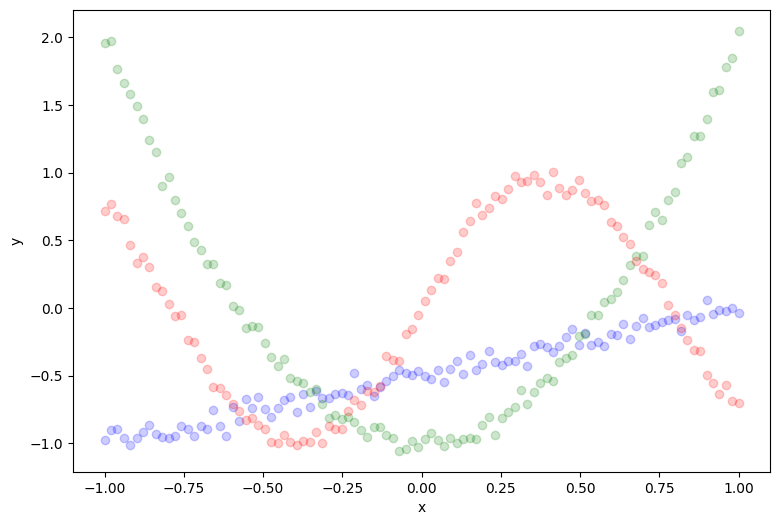

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(X, linear_f,  c="b", alpha=0.2)
ax.scatter(X, parabolic, c="g", alpha=0.2)
ax.scatter(X, wave,      c="r", alpha=0.2)

ax.set_xlabel('x')
ax.set_ylabel('y')

## Can we train a Neural Network to learn a regression line?

## Build a new Network

- **Question:** what's the first step ?

## What's the output?

- The output is a prediction which could take any value in $[-\infty, +\infty]$:
  - sigmoid does not fit
  - softmax is not useful either
  
- Indeed, it is sufficient not to apply any activation function
  - we want the activation function $f$ to do nothing
  - we can achieve this in Keras by not specifying the activation function

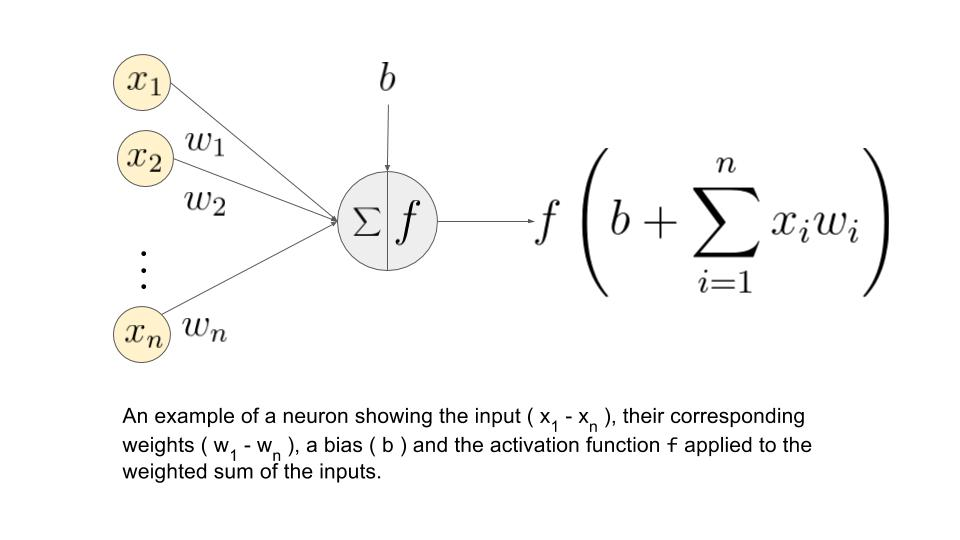

## What's the Loss?

- Typical loss for regression is **Mean Squared Error** between the prediction and the desired output.

- Keras provides several variants:
  - see: https://keras.io/losses/
  - `'mse'` = `'MSE'` = `'mean_squared_error'`
  - `'mae'` = `'MAE'` = `'mean_absolute_error'`
  - `'mape'` = `'MAPE'` = `'mean_absolute_percentage_error'`
  - `'msle'` = `'MSLE'` = `'mean_squared_logarithmic_error'`

## Build the network

The network can be very similar that of a binary classifier.

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# initialize the network
model = Sequential()

# add nodes to the network
model.add( Dense(8, input_shape=(1,) ) )
model.add( Activation("sigmoid") ) 

model.add( Dense(32) )
model.add( Activation("sigmoid") )


model.add( Dense(1) )
# No Activation

# finalize the network
model.compile( optimizer="rmsprop",
               loss='mean_squared_error',
               metrics=['mse', 'mae'] )


In [43]:
N_EPOCHS = 5000

In [44]:
# train the network
hist = model.fit( x=X, # training examples
                  y=linear_f, # desired output
                  epochs=N_EPOCHS, # number of training epochs 
                  verbose=0)

print( model.evaluate(X,linear_f) )

preds_linear = model.predict(X)

4/4 [==============================] - 0s 869us/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0415
[0.0027301833033561707, 0.0027301833033561707, 0.041533417999744415]
4/4 [==============================] - 0s 589us/step


In [45]:
# train the network
hist = model.fit( x=X, # training examples
                  y=parabolic, # desired output
                  epochs=N_EPOCHS, # number of training epochs 
                  verbose=0)

print ( model.evaluate(X,parabolic) )

preds_parabolic = model.predict(X)

4/4 [==============================] - 0s 871us/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0429
[0.002840078668668866, 0.002840078668668866, 0.04289821535348892]
4/4 [==============================] - 0s 559us/step


In [46]:
# train the network
hist = model.fit( x=X, # training examples
                  y=wave, # desired output
                  epochs=N_EPOCHS, # number of training epochs 
                  verbose=0)

print ( model.evaluate(X,wave) )

preds_wave = model.predict(X)

4/4 [==============================] - 0s 774us/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0398
[0.0025347257032990456, 0.0025347257032990456, 0.03978932276368141]
4/4 [==============================] - 0s 514us/step


## Plot Results

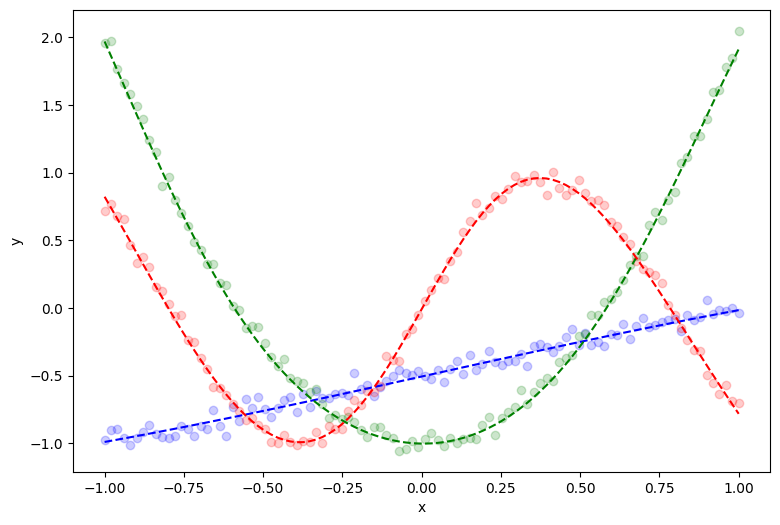

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(X, linear_f,  c="b", alpha=0.2)
ax.scatter(X, parabolic, c="g", alpha=0.2)
ax.scatter(X, wave,      c="r", alpha=0.2)

ax.plot(X, preds_linear,    'b--')
ax.plot(X, preds_parabolic, 'g--')
ax.plot(X, preds_wave,      'r--')

ax.set_xlabel('x')
ax.set_ylabel('y');

## Exercise: answer the following questions

- what is the smallest number of neurons to get good results for the linear curve?
- what is the smallest number of neurons to get good results for the parabolic curve?
- what is the smallest number of neurons to get good results for the wave curve?

- How many iterations do you need?

## A Small Update

## Problem type, loss, activations

| Problem Type | Last-layer Activation | Loss Function|
|-|-|-|
|Binary classification | `sigmoid` | `binary_crossentropy` |
|Multi-class classification | `softmax` | `categorical_crossentropy` |
| Regression | *None* | `mse` |
